## Interference Testing

In [1]:
%matplotlib inline

import numpy as np
import RPi.GPIO as GPIO
from ring_buffer import RingBuffer
import matplotlib.pyplot as plt
import pickle

from ultrasonic_sensor import UltrasonicSensor

In [2]:
GPIO.cleanup()
sensor1 = UltrasonicSensor(
    trigger=4,
    echo=17,
)
sensor2 = UltrasonicSensor(
    trigger=13,
    echo=19,
)

/usr/local/lib/python3.4/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: No channels have been set up yet - nothing to clean up!  Try cleaning up at the end of your program instead!
  """Entry point for launching an IPython kernel.


# Collect Measurements

In [8]:
import time
# intial parameters
n_iter = 2000


def measure():
    d1 = sensor1.distance()
    d2 = sensor2.distance()
    return d1, d2

sz = (n_iter,) # size of array
x = 35
zz = [measure() for _ in range(n_iter)]

In [15]:
z1, z2 = list(zip(*zz))
z1, z2

((677.154908780327,
  16.239763125565876,
  23.592670458613064,
  24.28861416405798,
  24.804145806610904,
  25.454723200701483,
  25.972719318857344,
  676.6059685108773,
  16.574902920946986,
  22.85523596485982,
  24.800979160197492,
  676.3911011724413,
  16.77675249007043,
  676.4973026038579,
  16.991964134399314,
  59.77133354422731,
  16.99970859748646,
  23.91725018077195,
  24.559738732192272,
  59.767464677876525,
  16.503865641707126,
  676.6242527823397,
  16.44548829142568,
  21.892387643036635,
  676.3689413042426,
  16.844974159175216,
  23.564535064251505,
  676.5845107889257,
  16.401175236287052,
  23.353185531324378,
  24.35015145493071,
  59.77098243425862,
  16.503514556301887,
  23.284612703124,
  24.16904390248692,
  676.5412578186422,
  16.47502807653509,
  22.602037852397007,
  23.168215842915377,
  24.626204949707425,
  59.92817459322377,
  16.668788778424823,
  23.301141498433207,
  60.07411799349084,
  60.28898530736351,
  60.06216028446979,
  16.7960967972

(0, 100)

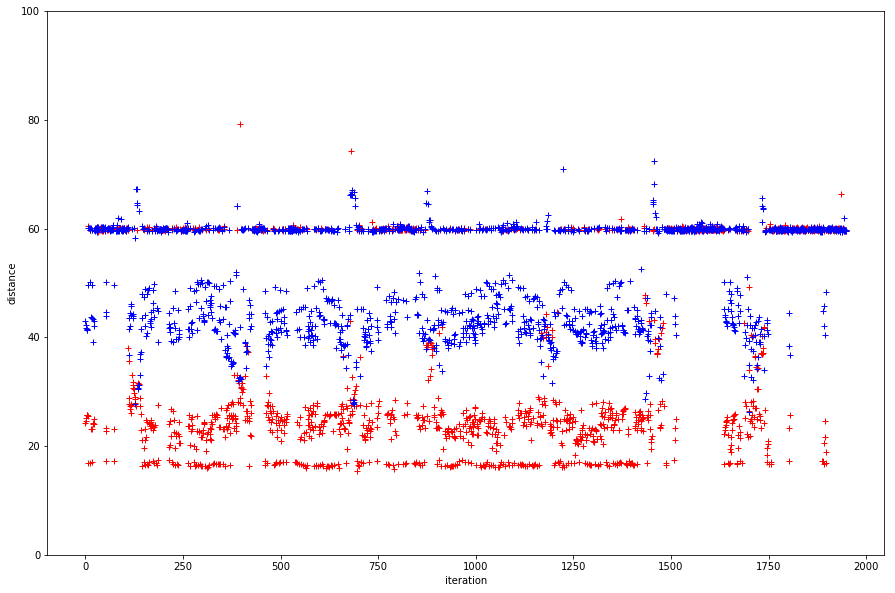

In [9]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.figure()
plt.plot(z1[50:],'r+',label='sensor 1')
plt.plot(z2[50:],'b+',label='sensor 2')

plt.xlabel('iteration')
plt.ylabel('distance')
plt.gca().set_ylim([0, 100])

# Run Filters

In [13]:
start = 60
median_sample_size = 25

history1 = RingBuffer(capacity=median_sample_size, dtype=np.float)
history2 = RingBuffer(capacity=median_sample_size, dtype=np.float)
median1 = []
median2 = []
for z in z1:
    history1.append(z)
    med = np.median(history1)
    if med > start:
        med = start - (med - start)
    median1.append(med)
for z in z2:
    history2.append(z)
    med = np.median(history2)
    if med > start:
        med = start - (med - start)
    median2.append(med)

Text(0,0.5,'distance')

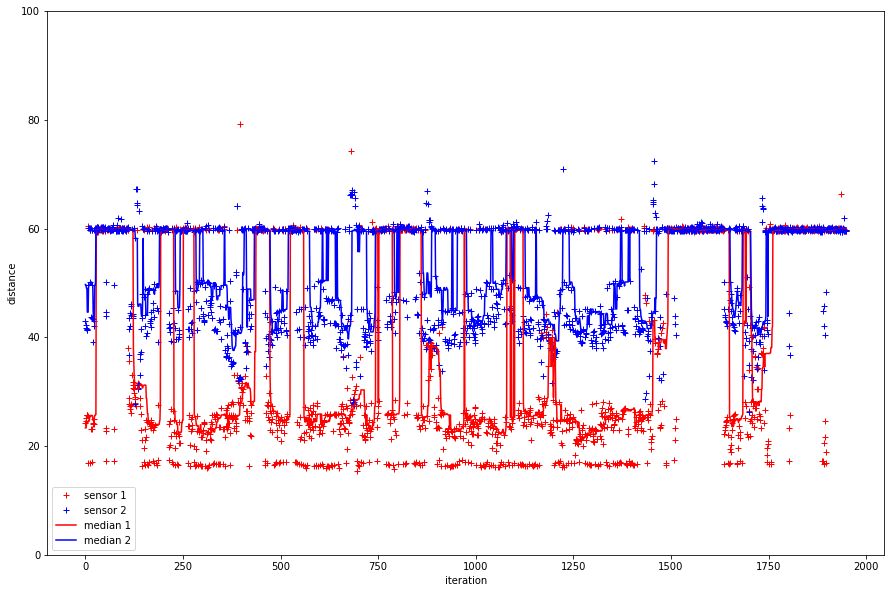

In [14]:
plt.rcParams['figure.figsize'] = (15, 10)
plt.figure()
plt.plot(z1[50:],'r+',label='sensor 1')
plt.plot(z2[50:],'b+',label='sensor 2')
plt.plot(median1[50:], 'r-', label='median 1')
plt.plot(median2[50:], 'b-', label='median 2')
plt.legend()
plt.gca().set_ylim([0, 100])
plt.xlabel('iteration')
plt.ylabel('distance')

In [12]:
with open('two_sensors.pkl', 'wb') as f:
    pickle.dump(zz, f)

In [36]:
GPIO.cleanup()